In [408]:
import xlrd
from matplotlib import pyplot as plt
import numpy as np
import matplotlib.pyplot as plt1
from mpl_toolkits.mplot3d import Axes3D

In [409]:
%matplotlib inline

In [410]:
file_loc = "C:/Users/Kulka/Documents/Major Project/python/AR2.xlsx"

In [411]:
workbook = xlrd.open_workbook(file_loc)

In [412]:
sheet = workbook.sheet_by_index(0)

In [413]:
data = [[sheet.cell_value(r,c) for c in range(sheet.ncols)] for r in range (sheet.nrows)]
dataX = [[sheet.cell_value(r,c) for c in range(sheet.ncols)] for r in range (sheet.nrows)]

In [414]:
data


[[6.25, 0.35, 0.5834373],
 [5.25, 0.45, 0.629389813],
 [5.25, 0.35, 0.574760282],
 [6.25, 0.95, 0.68873244],
 [6.25, 0.45, 0.641366481],
 [4.75, 0.95, 0.641527476],
 [4.75, 0.85, 0.569350082],
 [6.75, 0.85, 0.636637625],
 [5.25, 0.95, 0.640284692],
 [4.75, 0.35, 0.582780949],
 [6.75, 0.85, 0.768257834],
 [6.75, 0.45, 0.709075866]]

In [415]:
dataX

[[6.25, 0.35, 0.5834373],
 [5.25, 0.45, 0.629389813],
 [5.25, 0.35, 0.574760282],
 [6.25, 0.95, 0.68873244],
 [6.25, 0.45, 0.641366481],
 [4.75, 0.95, 0.641527476],
 [4.75, 0.85, 0.569350082],
 [6.75, 0.85, 0.636637625],
 [5.25, 0.95, 0.640284692],
 [4.75, 0.35, 0.582780949],
 [6.75, 0.85, 0.768257834],
 [6.75, 0.45, 0.709075866]]

In [416]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

def sigmoid_p(x):
    return sigmoid(x) * (1 - sigmoid(x))

In [417]:
def logit(x):
    return np.log(x)-np.log(1-x)

Text(0,0.5,'eth')

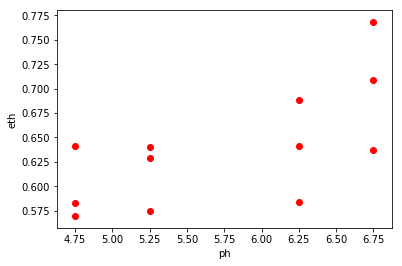

In [418]:
# scatter
for i in range(len(dataX)):
    point = dataX[i]
    color = 'r'
    plt.scatter(point[0],point[2], c = color)
plt.xlabel('ph')
plt.ylabel('eth')


Text(0,0.5,'eth')

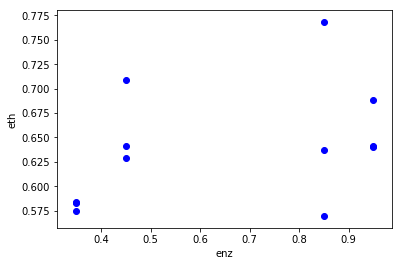

In [419]:
# scatter
for i in range(len(dataX)):
    point = dataX[i]
    color = 'b'
    plt.scatter(point[1],point[2], c = color)
plt.xlabel('enz')
plt.ylabel('eth')

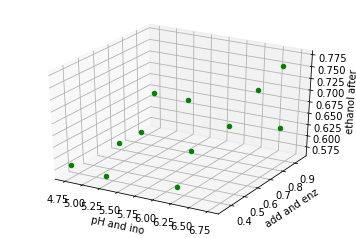

In [420]:
#3d scatter 
fig = plt1.figure()
ax = fig.add_subplot(111, projection = '3d')
for i in range(len(dataX)):
    pnt = dataX[i]
    color = 'g'    
    ax.scatter(pnt[0],pnt[1],pnt[2],c =color,marker='o')
    ax.set_xlabel('pH and ino')
    ax.set_ylabel('add and enz')
    ax.set_zlabel('ethanol after')

In [421]:
# summation function
def summFunc(x,wx,y,wy,bx):
    z = x * wx + y * wy + bx
    return z

In [422]:
# Error function
def costFunc(pred,target):
    cost = np.square(pred - target)
    #print(cost)
    return cost

def costFunc_p(pred,target):
    return 2 * (pred - target)

In [423]:
#Correction algorythm
def weighCorrectionFunc(x,y,z):
    A = x - y * z
    return A
    

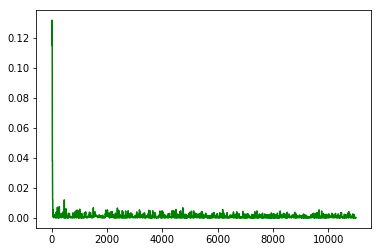

In [426]:
# training loop

w1 = np.random.randn()
w2 = np.random.randn()
b  = np.random.randn()

l_r = 0.072
iteration = 11011
costs = []
costs1= []

for i in range(iteration):
    ri = np.random.randint(len(data))
    point = data[ri]
    
    # step 1: Summation function
    z = summFunc(point[0],w1,point[1],w2,b)
    
    # step 2: Transformation function
    pred = sigmoid(z)
    
    target = point[2]
    
    # step 3: Error function
    cost = costFunc(pred,target)
    
    
    # Computation: derivatives 1; error and sigmoid 
    dcost_pred = costFunc_p(pred,target)
    dpred_dz = sigmoid_p(z)
    
    dcost_dz = dcost_pred * dpred_dz   
    
    # derivatives 2; partial derivatives of summation function
    dz_dw1 = point[0]
    dz_dw2 = point[1]
    dz_db  = 1
    
    #partial derivatives of cost w.r.t weights
    dcost_dw1 = dcost_dz * dz_dw1
    dcost_dw2 = dcost_dz * dz_dw2
    dcost_db  = dcost_dz * dz_db
    
    #Correction of weights
    
    w1 = weighCorrectionFunc(w1, l_r, dcost_dw1) 
    w2 = weighCorrectionFunc(w2, l_r, dcost_dw2) 
    b  = weighCorrectionFunc(b,  l_r, dcost_db)  
    
    if i%10==0:
        cost_sum = 0
        for j in range(len(data)):
            point = data[ri]
            
            z = summFunc(point[0],w1,point[1],w2,b)
            pred = sigmoid(z)
            
            target = point[2]
            cost_sum += np.square(pred - target)           
           
    costs1.append(cost_sum/len(data))
    
   
plt.plot(costs1, c='g')    

In [427]:
count = 0
for i in range(len(data)):
    point = data[i]
   # print(point)
    z = point[0] * w1 + point[1] * w2 + b
    pred = sigmoid(z)
    x = np.square(point[2]-pred)
    y = np.sqrt(x)
    axy =  logit(pred)  
    if y > 0.015 :
        print("pred (e): {}".format(pred))
        print("error: {}".format(y))
        print(axy)
        print("") 
        count += 1
    else:
        print("pred: {}".format(pred))
        print("error: {}".format(y))
        print(axy)
        print("")


w1, w2, b,count

pred (e): 0.6432533349573816
error: 0.059816034957381525
0.5895127275419614

pred (e): 0.6095089039899382
error: 0.019880909010061787
0.4452483899847073

pred (e): 0.6015203368511757
error: 0.02676005485117572
0.4118038816451356

pred: 0.6878699310116895
error: 0.0008625089883105286
0.7901797775793887

pred: 0.6508908265686021
error: 0.009524345568602044
0.622957235881533

pred: 0.6279930374081172
error: 0.013534438591882858
0.5236165087341499

pred (e): 0.620146950403431
error: 0.050796868403431006
0.49017200039457903

pred (e): 0.6996411621743956
error: 0.06300353717439566
0.84558969218823

pred: 0.6485042487466495
error: 0.008219556746649426
0.6124709316825632

pred: 0.5800428891790241
error: 0.0027380598209758578
0.3229494586967231

pred (e): 0.6996411621743956
error: 0.06861667182560438
0.84558969218823

pred (e): 0.6708013465340147
error: 0.03827451946598537
0.7118116588299455



(0.17770884589682565, 0.33444508339571205, -0.6382233385016981, 7)

In [434]:
dax = data
for i in range(len(data)):
    for j in range(len(data[i])):
        if j == 2:
            dax[i][j] = sigmoid(w1*data[i][0]+w2*data[i][1]+b)
            print(logit(data[i][j]))
        dax[i][j] = data[i][j]


0.5895127275419614
0.4452483899847073
0.4118038816451356
0.7901797775793887
0.622957235881533
0.5236165087341499
0.49017200039457903
0.84558969218823
0.6124709316825632
0.3229494586967231
0.84558969218823
0.7118116588299455


Text(0,0.5,'eth')

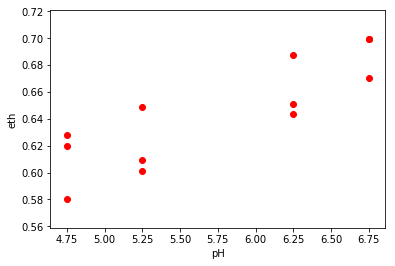

In [431]:
plt.scatter([dax[i][0] for i in range(len(dax))],[dax[i][2] for i in range(len(data))], c = 'r')

plt.xlabel('pH')
plt.ylabel('eth')

Text(0,0.5,'eth')

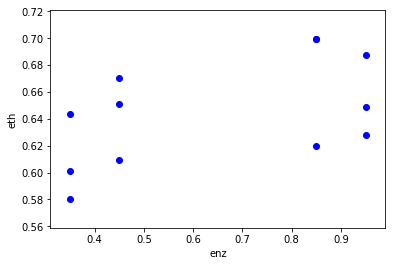

In [432]:
plt.scatter([dax[i][1] for i in range(len(dax))],[dax[i][2] for i in range(len(data))], c = 'b')

plt.xlabel('enz')
plt.ylabel('eth')

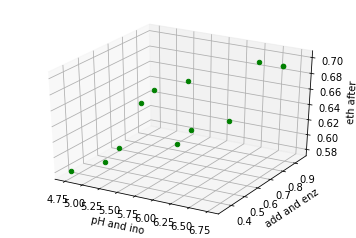

In [433]:
#3d scatter 
fig = plt1.figure()
ax = fig.add_subplot(111, projection = '3d')
for i in range(len(dax)):
    pnt = dax[i]
    color = 'g'    
    ax.scatter(pnt[0],pnt[1],pnt[2],c =color,marker='o')
    ax.set_xlabel('pH and ino')
    ax.set_ylabel('add and enz')
    ax.set_zlabel('eth after')